In [1]:
import matplotlib.pyplot as plt
import numpy as np

#from keras.models import Sequential
#from keras.layers import Dense

## Reading in the images

In [18]:
categories = ['elephant', 'zebra']
n_categories = len(categories)
X_train = []
labels = []

In [26]:
for i in range(0,5000):
    X_train.append(plt.imread('data/Train/IMG{}_elephant'.format(i)))
    labels.append(categories[0])
for i in range(7000,12000):
    if i != 10288:     # since this image gives an error for some reason
        X_train.append(plt.imread('data/Train/IMG{}_zebra'.format(i)))
        labels.append(categories[1])

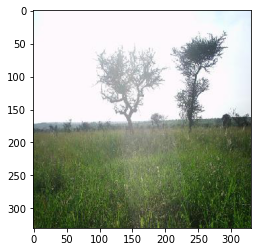

In [47]:
something = plt.imread('data/Train/IMG{}_elephant'.format(0))
plt.imshow(something, cmap='gray')
plt.show()

## One-hot encoding

In [53]:
ohe_labels = np.empty((len(labels), n_categories))
ohe = {'elephant': [1, 0], 'zebra': [0, 1]}
# generalize the above step to if there were n categories

for i in range(len(labels)):
    ohe_labels[i] = ohe.get(labels[i])
ohe_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Fully Connected Neural Network

The first goal here is get the images into the images into a 4D numpy array where the first dimension is the image index, the second and third are the x-coord and y-coord of the pixels and the fourth dimension is the brightness of the pixel.

In [41]:
# Attempt at change the the fourth dimension to a single value for brightness rather than rgb values

X_train_tester = []
for i in range(0,3):
    X_train_tester.append(plt.imread('data/Train/IMG{}_elephant'.format(i)))

    
X_train_tester_array = np.array(X_train_tester)    
    
print(X_train_array.shape)

for img in X_train_array:
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    brightness = 0.2989 * R + 0.5870 * G + 0.1140 * B
    
    print(i.shape)

#X_train_array = np.array(X_train)

    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #X_tr = 0.2989 * R + 0.5870 * G + 0.1140 * B
#print(X_train_array.shape)


(3, 330, 330, 3)
(330, 330, 3)
(330, 330, 3)
(330, 330, 3)


In [21]:
X_train_array = X_train_array.resize(9999, 330*330)

numpy.ndarray

In [42]:
placeholder = np.random.rand(50, 28, 28, 1)
# in the meantime before the data is processed

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(10, activation='relu', imput_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

# Reshape the input
placeholder_reshaped = placeholder.reshape(50, 28*28)

# Fit the model
model.fit(placeholder_reshaped, train_labels, validation_split=0.2, epochs=3)
    # need to define train_labels
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # change loss to binary_crossentropy
